In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet #from version 1.0 package name was changed from prophet to prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
df = pd.read_csv('../data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [3]:
model = Prophet(growth='linear',
                seasonality_mode='multiplicative',
                yearly_seasonality=4)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


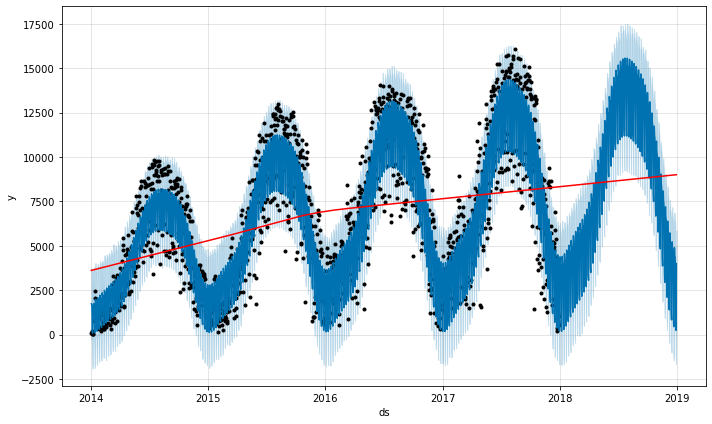

In [4]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

In [5]:
import numpy as np
import random
random.seed(42)  # set random seed for repeatability

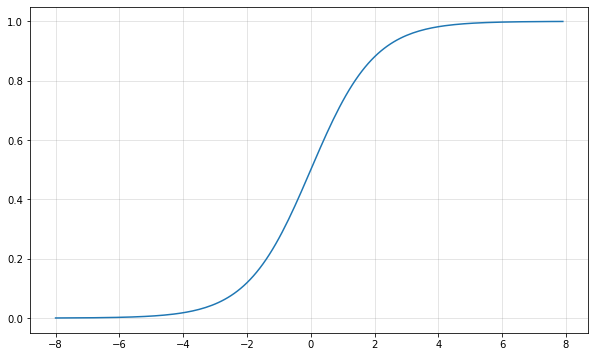

In [6]:
x = np.arange(-8, 8, .1)
y = [1 / (1 + np.e**(-val)) for val in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
plt.show()

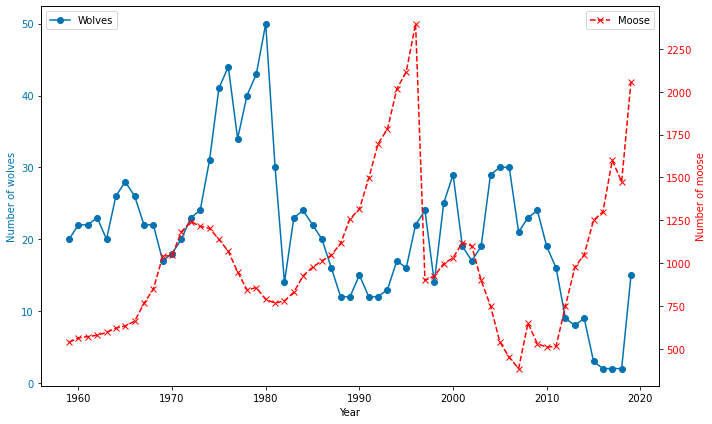

In [7]:
ir = pd.read_excel('../data/Data_wolves_moose_Isle_Royale_June2019.xlsx',
                     sheet_name='1. population level data',
                     header=1)

fig, ax1 = plt.subplots(figsize=(10, 6))
color = '#0072B2'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of wolves', color=color)
ax1.plot(ir['year'], ir['wolves'], color=color, ls='-', marker='o', label='Wolves')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'r'
ax2.set_ylabel('Number of moose', color=color)  # we already handled the x-label with ax1
ax2.plot(ir['year'], ir['moose'], color=color, ls='--', marker='x', label='Moose')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [8]:
x = pd.to_datetime(pd.date_range('1995-01', '2004-02', freq='M').strftime("%Y-%b").tolist())
y = [1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]  # create logistic curve
y = [y[idx] + y[idx] * .01 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]  # add sinusoidal variation
y = [val + random.uniform(-.01, .01) for val in y]  # add noise
y = [int(500 * val) for val in y]  # scale up

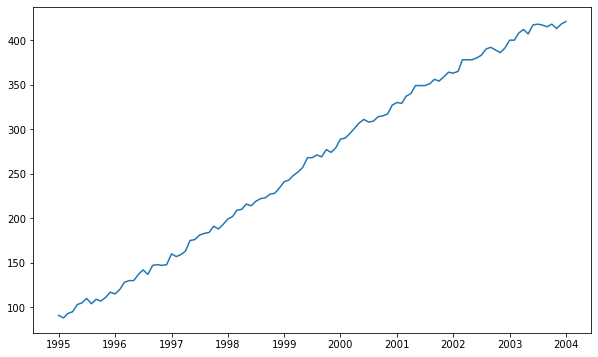

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

In [10]:
df = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


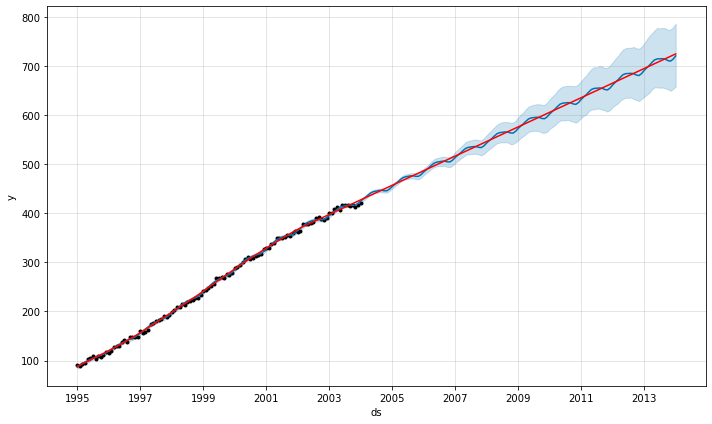

In [11]:
model = Prophet(growth='linear',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

In [12]:
df['cap'] = 500

In [13]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future['cap'] = 500

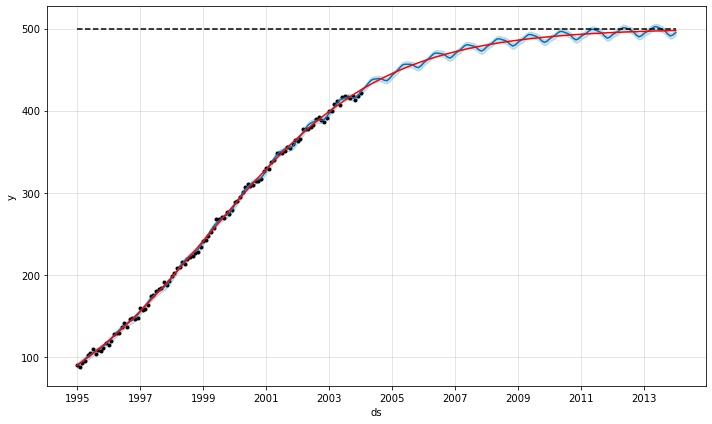

In [15]:
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

In [16]:
def set_cap(row, df):
    if row.year < 2007:
        return 500
    else:
        pop_2007 = 500
        idx_2007 = df[df['ds'].dt.year == 2007].index[0]
        idx_date = df[df['ds'] == row].index[0]
        return pop_2007 + 2 * (idx_date - idx_2007)

In [17]:
df['cap'] = df['ds'].apply(set_cap, args=(df,))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


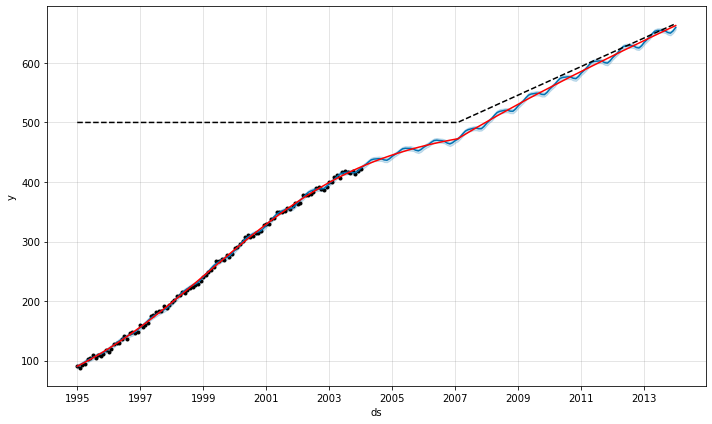

In [18]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
future['cap'] = future['ds'].apply(set_cap, args=(future,))
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

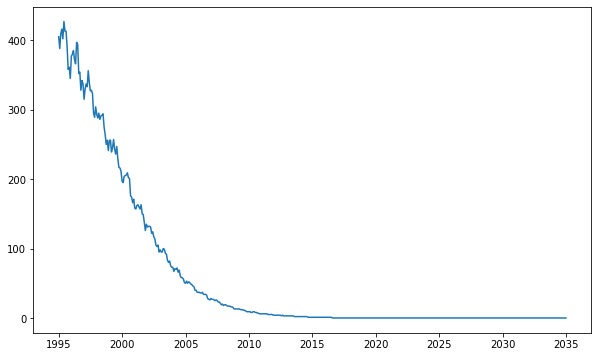

In [19]:
x = pd.to_datetime(pd.date_range('1995-01','2035-02', freq='M').strftime("%Y-%b").tolist())
y = [1 - 1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]  # create logistic curve
y = [y[idx] + y[idx] * .05 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]  # add sinusoidal variation
y = [val + 5 * val * random.uniform(-.01, .01) for val in y]  # add noise
y = [int(500 * val) for val in y]  # scale up
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

In [20]:
df2 = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})
df2 = df2[df2['ds'].dt.year < 2006]
df2['cap'] = 500
df2['floor'] = 0

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


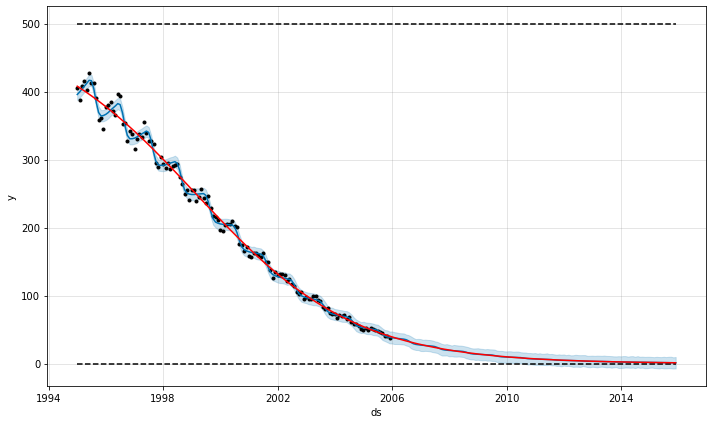

In [21]:
model = Prophet(growth='logistic',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df2)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
future['cap'] = 500
future['floor'] = 0
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

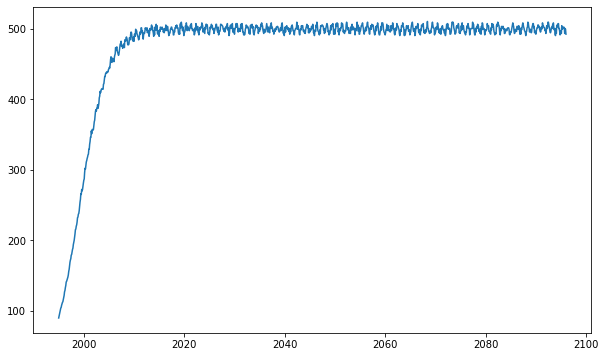

In [22]:
x = pd.to_datetime(pd.date_range('1995-01','2096-02', freq='M').strftime("%Y-%b").tolist())
y = [1 / (1 + np.e ** (-.03 * (val - 50))) for val in range(len(x))]  # create logistic curve
y = [y[idx] + y[idx] * .01 * np.sin((idx - 2) * (360 / 12) * (np.pi / 180)) for idx in range(len(y))]  # add sinusoidal variation
y = [val + 1 * val * random.uniform(-.01, .01) for val in y]  # add noise
y = [int(500 * val) for val in y]  # scale up
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()

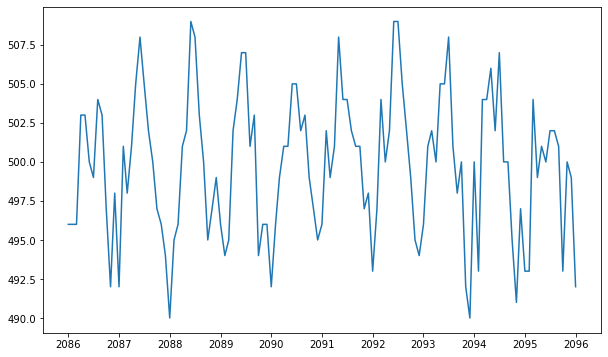

In [23]:
df = pd.DataFrame({'ds': pd.to_datetime(x), 'y': y})
df = df[df['ds'].dt.year > 2085]
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'])
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


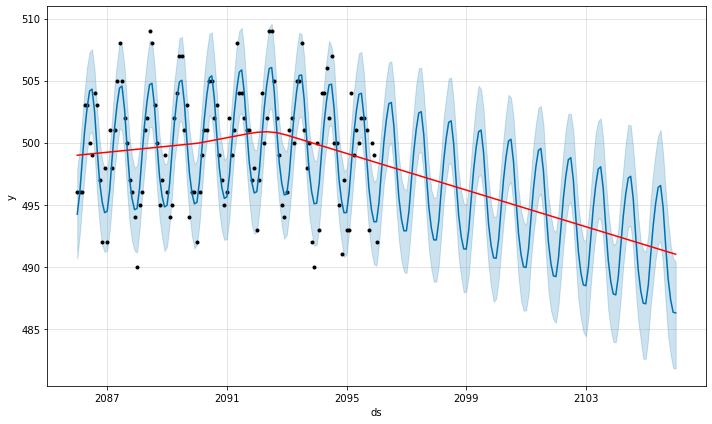

In [24]:
model = Prophet(growth='linear',
                yearly_seasonality=3,
                seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


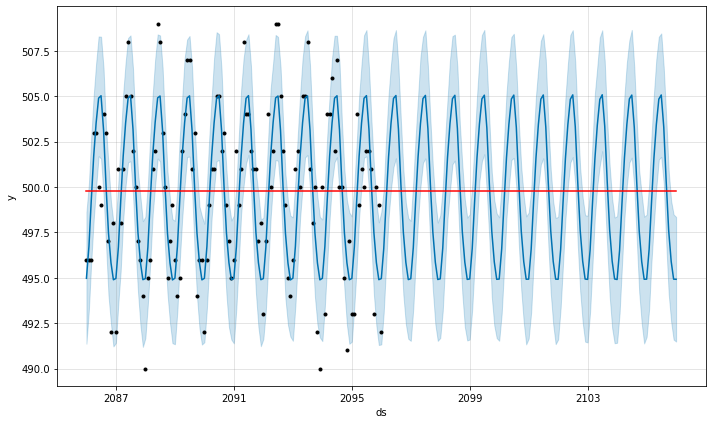

In [25]:
model = Prophet(growth='flat',
                yearly_seasonality=3)
model.fit(df)
future = model.make_future_dataframe(periods=12 * 10, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()